In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
dataset = pd.read_csv("data.csv")
dataset.head()
# dataset.tail()

,Age,WorkClass,FNLWGT,Education,Yrs-of-Education,Martial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
dataset.isnull().sum()

Age                 0
WorkClass           0
FNLWGT              0
Education           0
Yrs-of-Education    0
Martial-Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital-Gain        0
Capital-Loss        0
Hours-per-week      0
Native-Country      0
Income              0
dtype: int64

In [33]:
dataset['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [82]:
dataset['Hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: Hours-per-week, Length: 94, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

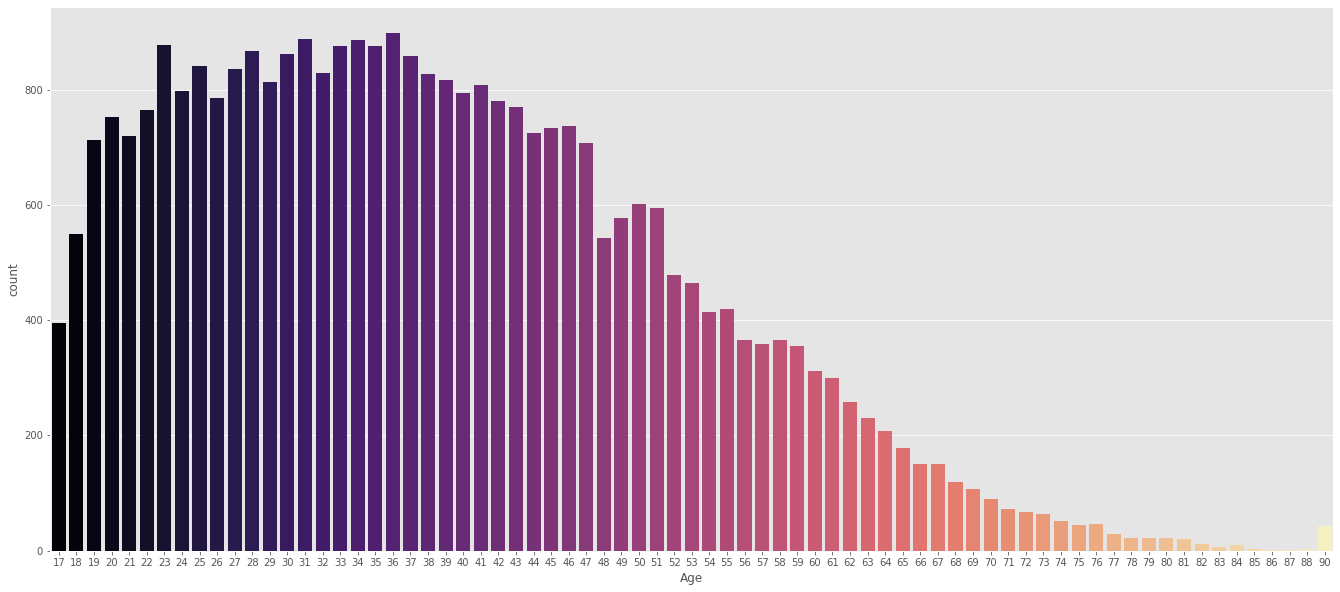

In [35]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'Age', data = dataset, palette='magma')

<AxesSubplot:xlabel='Hours-per-week', ylabel='count'>

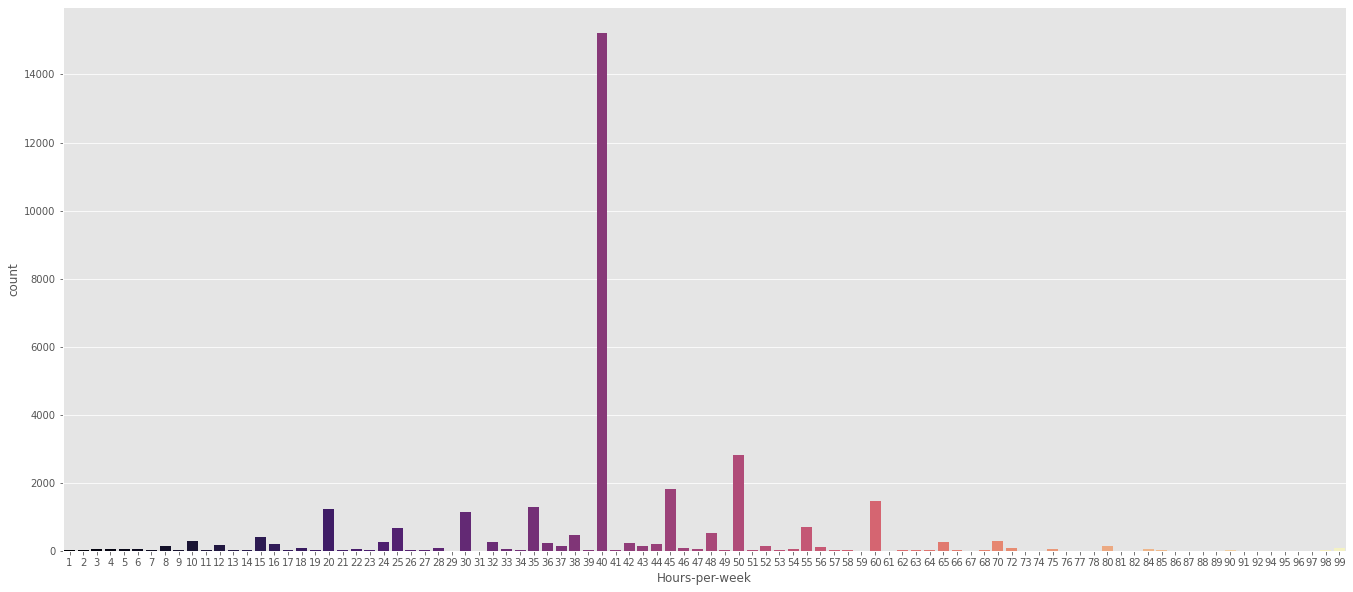

In [103]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'Hours-per-week', data = dataset, palette='magma')

In [83]:
X = dataset.iloc[:, [0,12]]
X

,Age,Hours-per-week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40
...,...,...
32556,27,38
32557,40,40
32558,58,40
32559,22,20


In [84]:
from sklearn.cluster import KMeans
# Use elbow method to find optimum number of cluster i.e. value of 'K'
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [85]:
wcss

[11022224.070943791,
 6846995.190536407,
 4922620.440638899,
 3712239.628547914,
 2854338.0729405433,
 2272954.5859428,
 2008369.8486647848,
 1749117.0265789,
 1542590.9616229795,
 1384000.6767773444,
 1277962.7432252709,
 1180009.8590280334,
 1084399.002264146,
 1003087.9066267598,
 938533.0646277638]

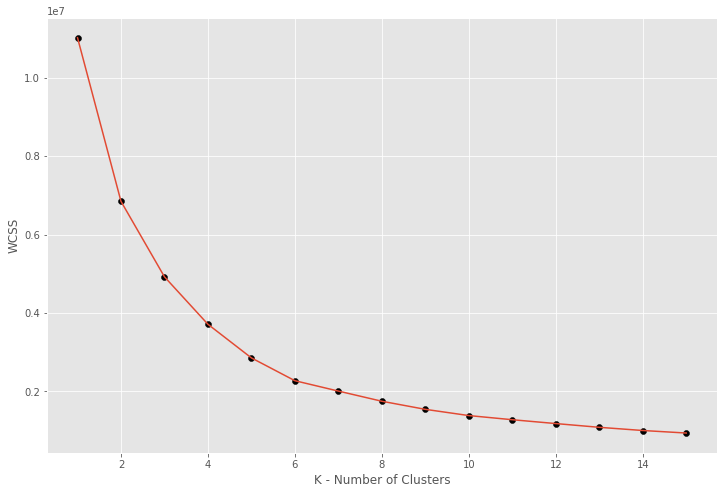

In [86]:

# Plot visualization b/w WCSS and Number of Clusters(K)
plt.figure(figsize=(12,8))
plt.plot(range(1,16), wcss)
# to view the points clearly we add scatter plot in addition to line
plt.scatter(range(1,16), wcss, c = 'black', marker='o')
plt.xlabel("K - Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [87]:
kmeans = KMeans(n_clusters = 8, init = 'random', max_iter= 300, n_init=10, random_state=0)

In [88]:
kmeans.fit(X)

KMeans(init='random', random_state=0)

In [89]:
y_clusters = kmeans.predict(X)
y_clusters

array([5, 2, 5, ..., 7, 3, 7])

In [90]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_clusters)
silhouette_avg

0.42482364730557715

In [104]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter= 300, n_init=10, random_state=0)

In [105]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [106]:
y_clusters = kmeans.predict(X)
y_clusters

array([3, 4, 3, ..., 0, 1, 0])

In [107]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_clusters)
silhouette_avg

0.4350319941147922

In [108]:
kmeans.cluster_centers_

array([[50.48745033, 41.67865103],
       [23.82020845, 20.74580197],
       [39.76781683, 64.2537891 ],
       [30.11907638, 41.3877087 ],
       [65.60545906, 20.57258065]])

In [109]:
y_clusters.astype

<function ndarray.astype>

In [110]:
x_array = np.array(X)
x_array

array([[39, 40],
       [50, 13],
       [38, 40],
       ...,
       [58, 40],
       [22, 20],
       [52, 40]], dtype=int64)

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


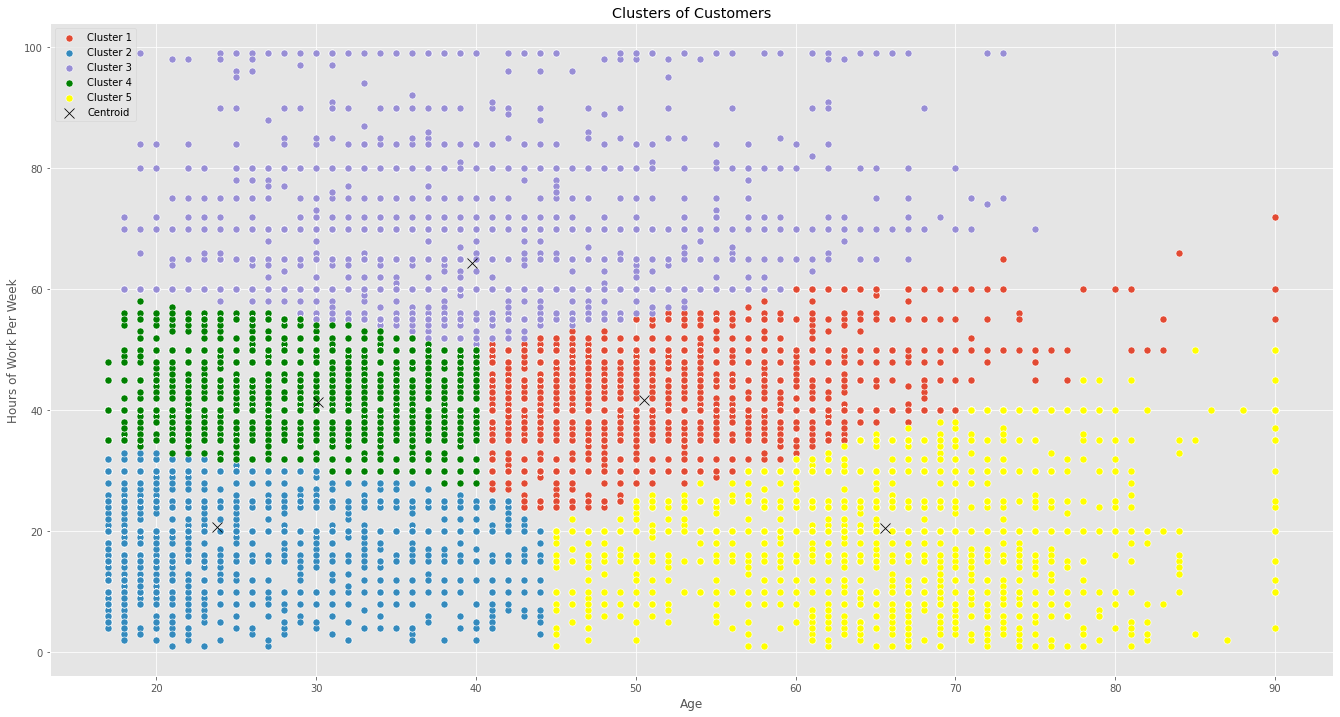

In [112]:
# Visualization of Cluster
plt.style.use("ggplot")
plt.figure(figsize=(23,12))
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Hours of Work Per Week') 

# x_array contain two values, Annual Income and Spending Score
# Index 0 - contains Annual Income and index 1 contains spending score
sns.scatterplot( x = x_array[y_clusters == 0, 0], y = x_array[y_clusters == 0, 1], label = "Cluster 1", s = 50)
sns.scatterplot( x = x_array[y_clusters == 1, 0], y = x_array[y_clusters == 1, 1], label = "Cluster 2", s = 50)
sns.scatterplot( x = x_array[y_clusters == 2, 0], y = x_array[y_clusters == 2, 1], label = "Cluster 3", s = 50)
sns.scatterplot( x = x_array[y_clusters == 3, 0], y = x_array[y_clusters == 3, 1], label = "Cluster 4", s = 50,color = 'green')
sns.scatterplot( x = x_array[y_clusters == 4, 0], y = x_array[y_clusters == 4, 1], label = "Cluster 5", s = 50,color = 'yellow')
#plot the centroid of the cluster inside the plot
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=100)
plt.show()

C:\Users\Ghost\AppData\Local\Temp/ipykernel_1496/2254775342.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'Total Yrs of Education')

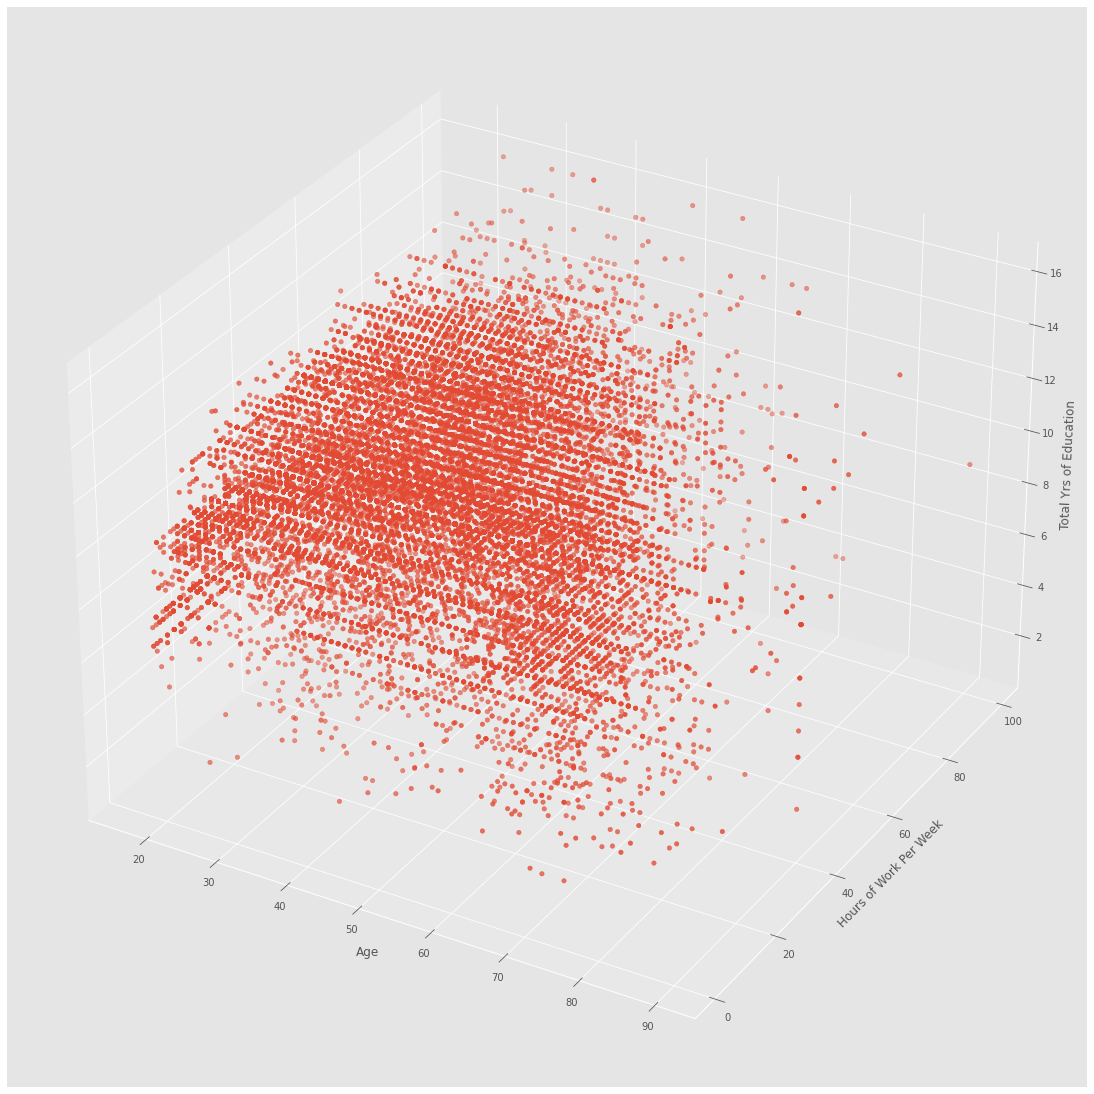

In [113]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
ax.scatter(dataset['Age'], dataset['Hours-per-week'], dataset['Yrs-of-Education'])
#ax.scatter(dataframe['x2'], dataframe['x1'], predicted)
ax.set_xlabel('Age')
ax.set_ylabel('Hours of Work Per Week')
ax.set_zlabel('Total Yrs of Education')